<a href="https://colab.research.google.com/github/LawTAGS/Deep-Learning-Classwork/blob/main/DL_02_MLP_Regresi_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0, x)

def relu_derivative(x):
  return (x > 0).astype(float)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  sig = sigmoid(x)
  return sig * (1 - sig)

def linear(x):
  return x

def linear_derivative(x):
  return np.ones_like(x)

activation_functions = {
    'relu': (relu, relu_derivative),
    'sigmoid': (sigmoid, sigmoid_derivative),
    'linear': (linear, linear_derivative)
}

def mse_loss(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

In [ ]:
class MLP:
  def __init__(self, layer_sizes, activation_funcs):
    self.layer_sizes = layer_sizes # Store the structure of the network

    # Initialize weights using He initialization for better performance
    self.weights = [np.random.randn(size_in, size_out) * np.sqrt(2./ size_in)
                    for size_in, size_out in zip(layer_sizes[:-1], layer_sizes[1:])]

    # Initialize biases as zero vectors
    self.biases = [np.zeros((1, size)) for size in layer_sizes[1:]]

    # Store the activation functions and their derivatives
    self.activations = [activation_functions[func][0] for func in activation_funcs]
    self.derivatives = [activation_functions[func][1] for func in activation_funcs]
    self.loss_history = [] # Stores the loss values for analysis

  def forward(self, X):
    a = X # Start with the input data
    for w, b, activation in zip(self.weights, self.biases, self.activations):
      z = np.dot(a, w) + b # Calculate the weighted sum
      a = activation(z) # Apply the activation function
    return a # Return the output of the network

  def backward(self, X, y):
    m = y.shape[0] # Number of training samples

    # Forward pass: Store activations and weighted sums
    activations = [X] # Store activations of each layers
    zs = [] # Store pre-activation values

    for w, b, activation in zip(self.weights, self.biases, self.activations):
      z = np.dot(activations[-1], w) + b
      zs.append(z)
      activations.append(activation(z))

    # Compute error at the output layer
    delta = (activations[-1] - y) / m # MSE Derivatives
    deltas = [delta] # Store error terms for each layer

    # Back propagations through hidden layers
    for i in range(len(self.weights) - 1, 0, -1):
      delta = np.dot(deltas[0], self.weights[i].T) * self.derivatives[i-1](zs[i - 1])
      deltas.insert(0, delta)

    # Compute weight and bias gradients
    weight_gradients = [np.dot(activations[i].T, deltas[i]) for i in range(len(self.weights))]
    bias_gradients = [np.sum(deltas[i], axis=0) for i in range(len(self.biases))]

    return weight_gradients, bias_gradients

  def update_parameters(self, grads, learning_rate):
    weight_gradients, bias_gradients = grads
    self.weights = [w - learning_rate * dw for w, dw in zip(self.weights, weight_gradients)]
    self.biases = [b - learning_rate * db for b, db in zip(self.biases, bias_gradients)]

  def train(self, X, y, epochs, learning_rate):
    for epoch in range(epochs):
      grads = self.backward(X, y) # Compute gradients
      self.update_parameters(grads, learning_rate) # Update parameters

      # Compute loss and store it
      loss = mse_loss(y, self.forward(X))
      self.loss_history.append(loss)

      # Print loss every 10,000 epochs for tracking progress
      if epoch % 10000 == 0:
        print(f'Epoch: {epoch}, Loss: {loss}')

In [ ]:
np.random.seed(20250303)
X = np.random.rand(100, 5) # 100 samples, 5 features
y = np.random.rand(100, 1) # 100 target values

layer_sizes = [5, 100, 50, 20, 1] # Input, hidden layers, output layer
activation_funcs = ['relu', 'relu', 'relu', 'relu'] # Activation functions for each layer

# Create MLP instance
mlp = MLP(layer_sizes, activation_funcs)

# Train the model
mlp.train(X, y, epochs=100000, learning_rate=0.01)

Epoch: 0, Loss: 0.13214559214186336
Epoch: 10000, Loss: 0.03746214267561364
Epoch: 20000, Loss: 0.024448977118103545
Epoch: 30000, Loss: 0.01334215094072076
Epoch: 40000, Loss: 0.0070160273372532325
Epoch: 50000, Loss: 0.003906563950424353
Epoch: 60000, Loss: 0.001925988155535814
Epoch: 70000, Loss: 0.0009730213077817001
Epoch: 80000, Loss: 0.00042357674926043006
Epoch: 90000, Loss: 0.0011946618760233258


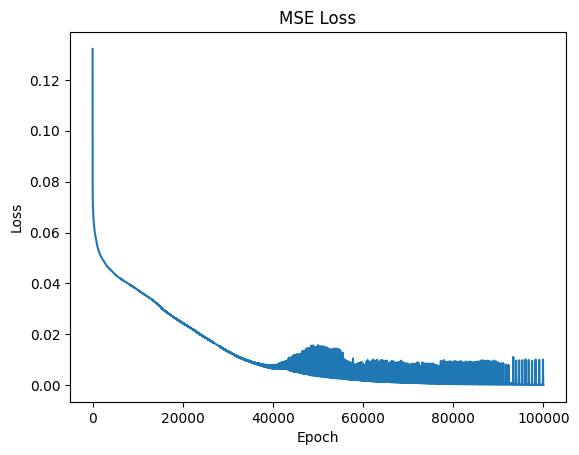

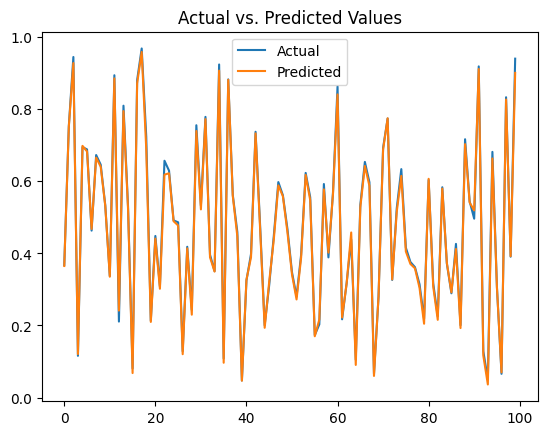

In [ ]:
plt.plot(mlp.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MSE Loss')
plt.show()

predictions = mlp.forward(X)
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()